In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [111]:
data_df = pd.read_csv("diabetes.csv")
data_df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [5]:
data_df.info()
data_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

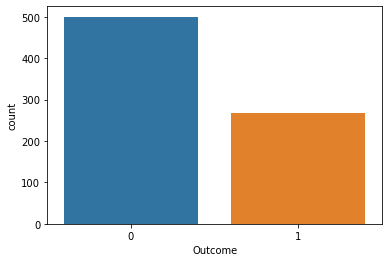

In [6]:
sns.countplot(x="Outcome", data=data_df)

<AxesSubplot:>

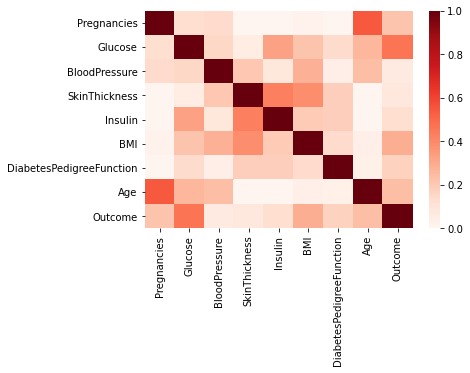

In [7]:
sns.heatmap(data_df.corr(), cmap="Reds", vmin= 0, vmax=1)

In [126]:
clf = RandomForestClassifier(max_depth=8, n_estimators=1000)

x = pd.DataFrame(data=data_df.iloc[:,[0,1,2,3,4,5,6,7]])
y = data_df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

data1 = {
    'predicted' : y_pred,
    'actual' : y_test
}

result_df = pd.DataFrame(data1)
result_df["correct"] = result_df.apply(lambda x:1 if x[0] == x[1] else 0, axis=1)



In [127]:

acc = result_df["correct"].mean() * 100
print(f"Genauigkeit: {acc}%")

Genauigkeit: 88.74458874458875%


In [10]:
Model = LogisticRegression(max_iter=10000000)

In [11]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'C' : np.logspace(-4, 4, 20),
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     }
]

In [12]:
clf = GridSearchCV(Model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [13]:
best_clf = clf.fit(x,y)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


C:\Users\Nico\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.65104167        nan 0.65104167 0.75390625
 0.75390625 0.66536458 0.66666667 0.66666667        nan        nan
        nan        nan        nan 0.77083333 0.77083333        nan
 0.703125   0.68229167        nan        nan 0.65104167        nan
 0.65104167 0.75390625 0.75390625 0.66796875 0.66927083 0.66927083
        nan        nan        nan        nan        nan 0.77083333
 0.77083333        nan 0.703125   0.68359375        nan        nan
 0.65104167        nan 0.65104167 0.75260417 0.75260417 0.67838542
 0.67838542 0.67838542        nan        nan        nan        nan
        nan 0.77083333 0.77083333        nan 0.703125   0.68229167
        nan        nan 0.65885417        nan 0.65885417 0.7578125
 0.7578125  0.68098958 0.67838542 0.68229167        nan        nan
        nan        nan        nan 0.77083333 0.77083333

In [14]:
best_clf.best_estimator_

LogisticRegression(C=11.288378916846883, max_iter=10000000)

In [15]:
print (f'Accuracy - : {best_clf.score(x,y):.3f}')

Accuracy - : 0.783


# 17.6

In [133]:
datas = data_df
datas

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      0.0  33.6   
1              1     85.0           66.0           29.0     39.0  26.6   
2              8    183.0           64.0           27.0      0.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0     39.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           27.0      0.0  30.1   
767            1     93.0           70.0           31.0     39.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [134]:
def median_convert(seriesname):
    mean_0 = datas.loc[datas.Outcome == 0, seriesname].median()
    mean_1 = datas.loc[datas.Outcome == 1, seriesname].median()
    datas.loc[datas.Outcome == 0, seriesname] = datas.loc[datas.Outcome == 0, seriesname].apply(lambda x: mean_0 if x == 0 else x)
    datas.loc[datas.Outcome == 1, seriesname] = datas.loc[datas.Outcome == 1, seriesname].apply(lambda x: mean_1 if x == 0 else x)

In [135]:
median_convert('Glucose')
median_convert('BloodPressure')
median_convert('SkinThickness')
median_convert('Insulin')
median_convert('BMI')

In [136]:
datas

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      0.0  33.6   
1              1     85.0           66.0           29.0     39.0  26.6   
2              8    183.0           64.0           27.0      0.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0     39.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           27.0      0.0  30.1   
767            1     93.0           70.0           31.0     39.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [137]:
clf = RandomForestClassifier(max_depth=8, n_estimators=1000)

x = pd.DataFrame(datas.iloc[:,[0,1,2,3,4,5,6,7]])
y = datas['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

data2 = {
    'predicted' : y_pred,
    'actual' : y_test
}

result_df = pd.DataFrame(data2)
result_df["correct"] = result_df.apply(lambda x:1 if x[0] == x[1] else 0, axis=1)

result_df

predicted  actual  correct
285          1       0        0
101          0       0        1
581          0       0        1
352          0       0        1
726          0       0        1
..         ...     ...      ...
241          0       0        1
599          0       0        1
650          0       0        1
11           1       1        1
214          0       1        0

[231 rows x 3 columns]

In [138]:
acc = result_df["correct"].mean() * 100
print(f"Genauigkeit: {acc}%")
# Es ist genauer geworden

Genauigkeit: 88.74458874458875%


In [139]:
Model2 = LogisticRegression(max_iter=10000000)
param_grid2 = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
     'C': np.logspace(-4, 4, 20),
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     }
]
clf = GridSearchCV(Model2, param_grid=param_grid2, cv=3, verbose=True, n_jobs=-1)
best_clf2 = clf.fit(x, y)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


C:\Users\Nico\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.65104167        nan 0.65104167 0.76432292
 0.76432292 0.6953125  0.69661458 0.69661458        nan        nan
        nan        nan        nan 0.7734375  0.7734375         nan
 0.70963542 0.70833333        nan        nan 0.65104167        nan
 0.65104167 0.76302083 0.76302083 0.71223958 0.71223958 0.71223958
        nan        nan        nan        nan        nan 0.7734375
 0.7734375         nan 0.70963542 0.70833333        nan        nan
 0.65104167        nan 0.65104167 0.76171875 0.76171875 0.70442708
 0.70572917 0.70703125        nan        nan        nan        nan
        nan 0.7734375  0.7734375         nan 0.70963542 0.70833333
        nan        nan 0.6875            nan 0.6875     0.76822917
 0.76822917 0.70963542 0.70963542 0.70963542        nan        nan
        nan        nan        nan 0.7734375  0.7734375 

In [140]:
print (f'Accuracy - : {best_clf.score(x,y):.3f}')
# fast gleich

Accuracy - : 0.781
